In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math

In [6]:
image = mpimg.imread('Pictures/frame0.jpg')
height=image.shape[0]
width=image.shape[1]
region_of_interest_vertices = [
    (0, height),
    (width / 2, height / 2),
    (width, height),
]

In [13]:
def region_of_interest(img, vertices):
    # Define a blank matrix that matches the image height/width.
    mask = np.zeros_like(img)    # Retrieve the number of color channels of the image.
    match_mask_color = 255
      
    # Fill inside the polygon
    cv2.fillPoly(mask, vertices, match_mask_color)
    
    # Returning the image only where mask pixels match
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [16]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
cannyed_image = cv2.Canny(gray_image, 100, 200)# Moved the cropping operation to the end of the pipeline.
cropped_image = region_of_interest(
    cannyed_image,
    np.array([region_of_interest_vertices], np.int32)
)
lines = cv2.HoughLinesP(
    cropped_image,
    rho=6,
    theta=np.pi / 60,
    threshold=160,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=25
)


In [28]:
def draw_lines(img,lines,color=[255,0,0],thickness=3):
    if lines is None:
        return
    img=np.copy(img)

    line_img=np.zeros((
        img.shape[0],
        img.shape[1],
        3),dtype=np.uint8
    )

    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_img,(x1,y1),(x2,y2),color,thickness)
    
    img=cv2.addWeighted(img,0.8,line_img,1.0,0.0)
    return img

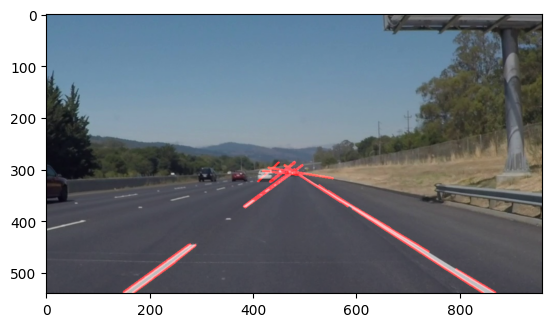

In [18]:
line_image = draw_lines(image, lines) # <---- Add this call.plt.figure()
plt.imshow(line_image)
plt.show()

In [21]:
left_line_x = []
left_line_y = []
right_line_x = []
right_line_y = []
for line in lines:
    for x1, y1, x2, y2 in line:
        slope = (y2 - y1) / (x2 - x1) # <-- Calculating the slope.
        if math.fabs(slope) < 0.5: # <-- Only consider extreme slope
            continue
        if slope <= 0: # <-- If the slope is negative, left group.
            left_line_x.extend([x1, x2])
            left_line_y.extend([y1, y2])
        else: # <-- Otherwise, right group.
            right_line_x.extend([x1, x2])
            right_line_y.extend([y1, y2])

In [23]:
min_y = image.shape[0] * (3 / 5) # <-- Just below the horizon
max_y = image.shape[0] # <-- The bottom of the image

In [24]:
poly_left = np.poly1d(np.polyfit(
    left_line_y,
    left_line_x,
    deg=1
))
left_x_start = int(poly_left(max_y))
left_x_end = int(poly_left(min_y))

poly_right = np.poly1d(np.polyfit(
    right_line_y,
    right_line_x,
    deg=1
))
right_x_start = int(poly_right(max_y))
right_x_end = int(poly_right(min_y))

In [29]:
line_image = draw_lines(
    image,
    [[
        [left_x_start, max_y, left_x_end, min_y],
        [right_x_start, max_y, right_x_end, min_y],
    ]],
    thickness=5,
)
plt.figure()
plt.imshow(line_image)
plt.show()

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'line'
> Overload resolution failed:
>  - Can't parse 'pt2'. Sequence item with index 1 has a wrong type
>  - Can't parse 'pt2'. Sequence item with index 1 has a wrong type
